# Modelos de Predição

In [1]:
import pandas as pd
import numpy as np

insights_data = pd.read_csv('insights-data.csv')

## separa dados e classe

In [2]:
labels = insights_data["insigths"].values
insights_columns = insights_data.select_dtypes(include=['float64','int64']).columns.drop('insigths').drop('class').drop('time')
features = insights_data[list(insights_columns)].values
features.shape

(330, 32)

## define rotina de testes

In [3]:
from scipy.stats import spearmanr
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_regression

def simple_spearman(x,y): return np.abs(spearmanr(x,y)[0])
spearmanr_scorer = make_scorer(simple_spearman)

def cv4kBestReg(model, feats, labs, cvOpt, loops):
    result_list = []
    for i in range(1, loops+1):
        kbest_features = SelectKBest(f_regression, k=i).fit_transform(feats, labs)
        scores = cross_val_score(model, kbest_features, labels, cv=cvOpt, scoring=spearmanr_scorer)
        result_list.append(scores.mean())
        
    return result_list

## executa teste sobre modelos regressão

In [4]:
linear_model = LinearRegression()
spearmanr_scores_linear = cv4kBestReg(linear_model, features, labels, 10, 20)

In [5]:
linearSVR_model = LinearSVR(epsilon=0.01)
spearmanr_scores_svrLinear = cv4kBestReg(linearSVR_model, features, labels, 10, 20)

In [6]:
svr_model = SVR(C=1.0, epsilon=0.01, kernel='rbf')
spearmanr_scores_svr = cv4kBestReg(svr_model, features, labels, 10, 20)

## mostra resultados

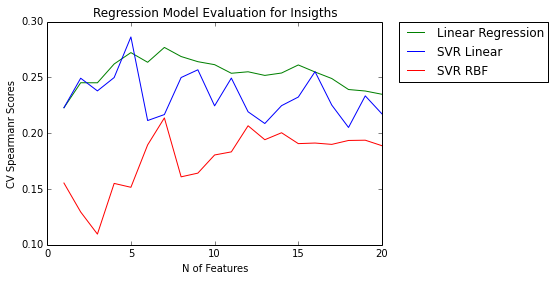

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

n_features = range(1, 21)

plt.plot(n_features, spearmanr_scores_linear, 'g', label='Linear Regression')
plt.plot(n_features, spearmanr_scores_svrLinear, 'b', label='SVR Linear')
plt.plot(n_features, spearmanr_scores_svr, 'r', label='SVR RBF')
plt.xlabel('N of Features')
plt.ylabel('CV Spearmanr Scores')
plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Regression Model Evaluation for Insigths')
plt.show()

## define rotina de classificação

In [8]:
from sklearn.feature_selection import chi2
def cv4kBestClass(model, feats, labs, cvOpt, loops):
    result_list = []
    for i in range(1, loops+1):
        kbest_features = SelectKBest(chi2, k=i).fit_transform(feats, labs)
        scores = cross_val_score(model, kbest_features, labels, cv=cvOpt)
        result_list.append(scores.mean())
        
    return result_list

## executa modelos de classificação

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
scores_gnb = cv4kBestClass(gnb_model, features, labels, 10, 20)

In [10]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
scores_mnb = cv4kBestClass(mnb_model, features, labels, 10, 20)

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=0)
scores_tree = cv4kBestClass(tree_model, features, labels, 10, 20)

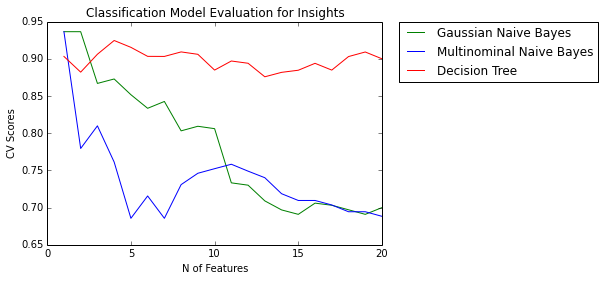

In [12]:
plt.figure()

n_features = range(1, 21)

plt.plot(n_features, scores_gnb, 'g', label='Gaussian Naive Bayes')
plt.plot(n_features, scores_mnb, 'b', label='Multinominal Naive Bayes')
plt.plot(n_features, scores_tree, 'r', label='Decision Tree')
plt.xlabel('N of Features')
plt.ylabel('CV Scores')
plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Classification Model Evaluation for Insights')
plt.show()

## Melhores métricas pelo SelectKBest Chi2

In [13]:
kbest_features = SelectKBest(chi2, k=5).fit_transform(features, labels)
for i in range(1, 11):
    print kbest_features[i]

[ 218.     12.84    0.     24.31    2.29]
[ 14.    14.29   0.    21.43   7.14]
[  4.03000000e+02   1.43900000e+01   2.50000000e-01   2.82900000e+01
   5.21000000e+00]
[ 109.      8.26    0.     21.1     3.67]
[ 88.    10.23   3.41  14.77   1.14]
[ 211.      8.06    0.     21.33    1.42]
[ 162.     13.58    0.     19.14    3.09]
[ 56.    10.71   0.    23.21   0.  ]
[ 123.     13.01    0.     28.46    1.63]
[ 138.     15.94    0.     22.46    7.25]


In [14]:
insights_data.head(11)

,amostra,filename,insigths,segment,wc,wps,i,we,you,they,...,posemo,negemo,anx,sad,cogmech,insight,cause,discrep,tentat,certain
0,Daniela,and01.txt,0,1,250,10.42,10.40,0.80,0.00,0.40,...,7.20,1.60,0.00,0.00,25.20,3.60,3.20,2.80,1.20,3.60
1,Daniela,and02.txt,0,1,218,12.11,12.84,0.46,0.00,0.00,...,3.67,0.92,0.00,0.46,24.31,2.29,0.92,3.21,3.67,2.75
2,Daniela,and03.txt,0,1,14,4.67,14.29,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,21.43,7.14,0.00,7.14,7.14,0.00
3,Daniela,and04.txt,0,1,403,8.57,14.39,0.00,0.25,0.50,...,5.46,3.47,0.00,0.50,28.29,5.21,2.98,4.22,3.23,2.48
4,Daniela,and05.txt,0,1,109,12.11,8.26,0.00,0.00,0.92,...,1.83,5.50,2.75,0.00,21.10,3.67,0.92,1.83,4.59,2.75
5,Daniela,and06.txt,0,1,88,6.77,10.23,0.00,3.41,0.00,...,4.55,7.95,2.27,1.14,14.77,1.14,0.00,1.14,2.27,2.27
6,Daniela,and07.txt,0,1,211,8.44,8.06,0.00,0.00,0.95,...,7.11,3.32,0.95,0.47,21.33,1.42,0.95,1.90,4.27,1.90
7,Daniela,and08.txt,0,1,162,8.53,13.58,0.00,0.00,0.00,...,6.17,11.11,1.85,7.41,19.14,3.09,4.32,0.62,0.62,0.00
8,Daniela,and09.txt,0,1,56,11.20,10.71,1.79,0.00,0.00,...,3.57,3.57,1.79,1.79,23.21,0.00,1.79,1.79,3.57,0.00
9,Daniela,and10.txt,0,1,123,11.18,13.01,0.81,0.00,0.81,...,3.25,3.25,0.81,0.81,28.46,1.63,2.44,4.88,3.25,0.81


### Ordem do SelectKBest Chi2
* 1 - i
* 2 - wc
* 3 - you
* 4 - insight
* 5 - cogmech